# XGBoost

In [20]:
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import sklearn.externals 
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from matplotlib import figure as fig
import pickle
import joblib
from time import time

## Pima Indians Dataset

In [3]:
#Load the data Pima Indians dataset.
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/pima-indians-diabetes.csv"
dataset_pd = pd.read_csv(url)
dataset = np.array(dataset_pd)
dataset.shape

(767, 9)

In [4]:
# Seperating target and predictors
X = dataset[:,0:8]
y = dataset[:,8]

In [5]:
# Train and test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)

In [6]:
# Fitting the XGBoost Model. The XGBoost use Scikit - learn API.
model = xg.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
# Make prediction with XGBoost Model
predictions = model.predict(X_test)

In [25]:
# Accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy* 100))

Accuracy: 71.65%


The accuracy of the model is 71.65%. We are correctly predicting the class 71.65% of the time.

* Boosting Algorithm expects only the numerical variables. So we need to conver categorical to numerical variables.

## Iris dataset (Encoding Categorical variables)

In [27]:
# Loading the Iris dataset.
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Iris.csv"
data = pd.read_csv(url)
dataset = data.values
dataset.shape

(149, 5)

In [30]:
# Seperating target and predictors
X = dataset[:,0:4]
y = dataset[:,4]

In [31]:
#Encode string values as numerical
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoder_y = label_encoder.transform(y)

In [33]:
# Train and test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, label_encoder_y, test_size = 0.33, random_state = 7)

In [34]:
# Fitting the XGBoost Model. The XGBoost use Scikit - learn API.
model = xg.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
# Make prediction with XGBoost Model
predictions = model.predict(X_test)

In [36]:
# Accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy* 100))

Accuracy: 92.00%


The objective function has changed to "multi:softprob" because of the multiclass classification. We will now look at a dataset where all the variables are categorical.

## Breast Cancer Dataset (One Hot Encoding) :-

In [47]:
# Loading the Breast Cancer dataset.
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/breast-cancer.data"
data = pd.read_csv(url, header = None)
dataset = data.values
dataset.shape

(286, 10)

In [49]:
# Seperating target and predictors
X = dataset[:,0:9]
y = dataset[:,9]

In [53]:
columns = []
for i in range(X.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X[:,i])
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse = False)
    feature = onehot_encoder.fit_transform(feature)
    columns.append(feature)

# Collapse columns into array
encoded_x = np.column_stack(columns)

In [57]:
#Encode string values as numerical
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoder_y = label_encoder.transform(y)

In [58]:
# Train and test split of the data
X_train, X_test, y_train, y_test = train_test_split(encoded_x, label_encoder_y, test_size = 0.33, random_state = 7)

In [59]:
# Fitting the XGBoost Model. The XGBoost use Scikit - learn API.
model = xg.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
# Make prediction with XGBoost Model
predictions = model.predict(X_test)

In [61]:
# Accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy* 100))

Accuracy: 71.58%


## Horse Colic Dataset (Support for Missing Data) :-

XGBoost is designed to work with sparse data or the missing data. We will now use a data with a lot missing values.

In [66]:
# Loading the Horse Colic dataset.
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Horse_Colic.csv"
data = pd.read_csv(url, header = None)
dataset = data.values
dataset.shape

(300, 28)

In [70]:
# set missing value to 0
dataset[dataset == '?'] = 0
dataset = dataset.astype('float32')

In [74]:
# Seperating target and predictors
X = dataset[:,0:27]
y = dataset[:,27]

In [75]:
#Encode string values as numerical
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoder_y = label_encoder.transform(y)

In [76]:
# Train and test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, label_encoder_y, test_size = 0.33, random_state = 7)

In [77]:
# Fitting the XGBoost Model. The XGBoost use Scikit - learn API.
model = xg.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
# Make prediction with XGBoost Model
predictions = model.predict(X_test)

In [79]:
# Accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy* 100))

Accuracy: 82.83%


We have changed the "?" to 0 in above example. 0 is the sparse value expected by XGBoost. Now we will just replace with "?" with Nan.

In [80]:
dataset = data.values
dataset[dataset == '?'] = np.nan
dataset = dataset.astype('float32')
X = dataset[:,0:27]

# Train and test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, label_encoder_y, test_size = 0.33, random_state = 7)

# Fitting the XGBoost Model. The XGBoost use Scikit - learn API.
model = xg.XGBClassifier()
model.fit(X_train, y_train)

# Make prediction with XGBoost Model
predictions = model.predict(X_test)

# Accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy* 100))

Accuracy: 83.84%


We will now impute the missing values using mean value.

In [83]:
impute = SimpleImputer()
imputed_x = impute.fit_transform(X)
# Train and test split of the data
X_train, X_test, y_train, y_test = train_test_split(imputed_x, label_encoder_y, test_size = 0.33, random_state = 7)

# Fitting the XGBoost Model. The XGBoost use Scikit - learn API.
model = xg.XGBClassifier()
model.fit(X_train, y_train)

# Make prediction with XGBoost Model
predictions = model.predict(X_test)

# Accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy* 100))

Accuracy: 81.82%


## Evaluate Model using K-Fold Cross Validation

In [88]:
#Load the data Pima Indians dataset.
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/pima-indians-diabetes.csv"
dataset_pd = pd.read_csv(url)
dataset = np.array(dataset_pd)

# Seperating target and predictors
X = dataset[:,0:8]
y = dataset[:,8]

model = xg.XGBClassifier()
kfold = KFold(n_splits = 10)
results = cross_val_score(model, X, y, cv = kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 73.67% (4.58%)


For an imbalanced class problem, we might wants to use stratifiedKFold.

In [91]:
kfold = StratifiedKFold(n_splits = 10)
results = cross_val_score(model, X, y, cv = kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 73.55% (4.64%)


### Plotting a tree from XGBoost

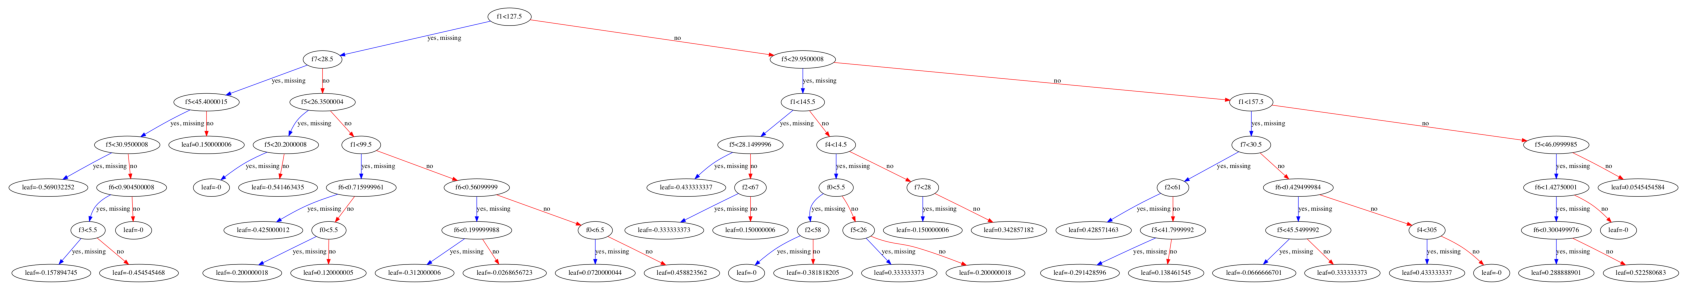

In [124]:
model = xg.XGBClassifier()
model.fit(X,y)
fig, ax = plt.subplots(figsize=(30, 60))
xg.plot_tree(model, ax = ax, num_tree = 0)
plt.show()

## Save and load trained XGBoost Models

In [8]:
# save model to a file named pima.pickle
pickle.dump(model, open('pima.pickle', 'wb'))

In [9]:
# load model in to the environment.
loaded_model = pickle.load(open('pima.pickle','rb'))

The model loaded above can be used to make predictions. We can also use joblib for saving the model.

In [14]:
# save model to a file named pima.joblib.dat
joblib.dump(model, 'pima.joblib.dat')

['pima.joblib.dat']

In [16]:
# load model in to the environment.
loaded_model = joblib.load('pima.joblib.dat')

In [18]:
predictions = loaded_model.predict(X_test)
# Accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy* 100))

Accuracy: 71.65%


## Feature Importance and Feature Selection

Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for.

In [19]:
# Print variable importance
print(model.feature_importances_)

[0.11493116 0.22045502 0.09356379 0.09347729 0.09980775 0.16706984
 0.1097094  0.1009858 ]


In [21]:
# Plot the feature importance.
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

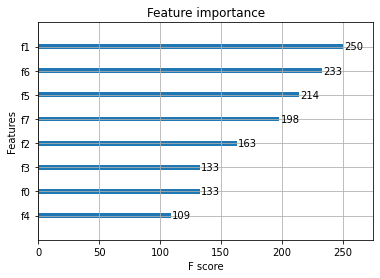

In [23]:
# We can also use the built-in fucntion for the plotting of feature importance.
xg.plot_importance(model)
plt.show()

### Feature selection using XGBoost feature selection score.

In [30]:
for thresh in model.feature_importances_:
    selection = SelectFromModel(model, threshold = thresh, prefit = True)
    Select_X_train = selection.transform(X_train)
    selection_model = xg.XGBClassifier()
    selection_model.fit(Select_X_train, y_train)
    Select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(Select_X_test)
    print("Thresh: %.3f, n = %d, Accuracy: %.2f%%" % (thresh, Select_X_train.shape[1], accuracy_score(y_test, y_pred)* 100))

Thresh: 0.115, n = 3, Accuracy: 71.65%
Thresh: 0.220, n = 1, Accuracy: 70.87%
Thresh: 0.094, n = 7, Accuracy: 73.62%
Thresh: 0.093, n = 8, Accuracy: 71.65%
Thresh: 0.100, n = 6, Accuracy: 74.02%
Thresh: 0.167, n = 2, Accuracy: 74.41%
Thresh: 0.110, n = 4, Accuracy: 71.65%
Thresh: 0.101, n = 5, Accuracy: 74.02%


## Monitor training performance and Early Stopping
Early stopping is an approach to training complex machine learning models to avoid overfitting. It works by monitoring the performance of the model that is being trained on a separate test dataset and stopping the training procedure once the performance on the test dataset has not improved after a fixed number of training iterations.

In [2]:
# Morning training performance
#Load the data Pima Indians dataset.
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/pima-indians-diabetes.csv"
dataset_pd = pd.read_csv(url)
dataset = np.array(dataset_pd)

# Seperating target and predictors
X = dataset[:,0:8]
y = dataset[:,8]

# Train and test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)

# Defining a evaluation test.
eval_set = [(X_test, y_test)]
# Fitting the XGBoost Model. The XGBoost use Scikit - learn API.
model = xg.XGBClassifier()
model.fit(X_train, y_train, eval_metric = 'error', eval_set = eval_set, verbose = True)

[0]	validation_0-error:0.29921
[1]	validation_0-error:0.25591
[2]	validation_0-error:0.22441
[3]	validation_0-error:0.21654
[4]	validation_0-error:0.20079
[5]	validation_0-error:0.22835
[6]	validation_0-error:0.23228
[7]	validation_0-error:0.22047
[8]	validation_0-error:0.21654
[9]	validation_0-error:0.22835
[10]	validation_0-error:0.22835
[11]	validation_0-error:0.22835
[12]	validation_0-error:0.23228
[13]	validation_0-error:0.23228
[14]	validation_0-error:0.22835
[15]	validation_0-error:0.24803
[16]	validation_0-error:0.24016
[17]	validation_0-error:0.24016
[18]	validation_0-error:0.24016
[19]	validation_0-error:0.24803
[20]	validation_0-error:0.24409
[21]	validation_0-error:0.24803
[22]	validation_0-error:0.25197
[23]	validation_0-error:0.25591
[24]	validation_0-error:0.25591
[25]	validation_0-error:0.24803
[26]	validation_0-error:0.25591
[27]	validation_0-error:0.25197
[28]	validation_0-error:0.25197
[29]	validation_0-error:0.25591
[30]	validation_0-error:0.25984
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
# Producing learning curves from the xgboost.
# Defining a evaluation test.
eval_set = [(X_train, y_train),(X_test, y_test)]
# Fitting the XGBoost Model. The XGBoost use Scikit - learn API.
model = xg.XGBClassifier()
model.fit(X_train, y_train, eval_metric = ['error','logloss'], eval_set = eval_set, verbose = False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
# In the output validation_0 is the training data and validation_1 is the test data.
result = model.evals_result_
print(result)

{'validation_0': {'error': [0.167641, 0.146199, 0.128655, 0.116959, 0.091618, 0.077973, 0.068226, 0.068226, 0.05848, 0.05653, 0.050682, 0.048733, 0.046784, 0.046784, 0.038986, 0.031189, 0.02924, 0.015595, 0.017544, 0.009747, 0.009747, 0.007797, 0.009747, 0.009747, 0.005848, 0.005848, 0.005848, 0.005848, 0.005848, 0.005848, 0.003899, 0.003899, 0.005848, 0.003899, 0.003899, 0.001949, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'logloss': [0.562398, 0.485507, 0.423057, 0.374144, 0.337928, 0.310839, 0.290339, 0.272881, 0.259984, 0.243248, 0.231159, 0.223224, 0.216505, 0.213184, 0.202324, 0.187931, 0.180396, 0.171102, 0.166493, 0.156309, 0.152547, 0.14613, 0.143403, 0.140238, 0.134307, 0.127619, 0.12433, 0.120774, 0.11

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (14,5))
ax1.plot(range(0,len(result['validation_0']['logloss'])), result['validation_0']['logloss'], label = 'Train')
ax1.plot(range(0,len(result['validation_1']['logloss'])), result['validation_1']['logloss'], label = 'Test')
ax1.legend()
ax1.set_ylabel("Log Loss")
ax1.set_title("XGBoost Log Loss")

ax2.plot(range(0,len(result['validation_0']['error'])), result['validation_0']['error'], label = 'Train')
ax2.plot(range(0,len(result['validation_1']['error'])), result['validation_1']['error'], label = 'Test')
ax2.legend()
ax2.set_ylabel("Error")
ax2.set_title("XGBoost Classification Error")
plt.show()

Looking at the plot, we can say that after the 10th iteration, test error starts increasing. So we will stop our model at 10.

XGBoost supports early stopping after a fixed number of iterations. In addition to specifying a metric and test dataset for evaluation each epoch, you must specify a window of the number of epochs over which no improvement is observed.

In [31]:
# Defining a evaluation test.
eval_set = [(X_test, y_test)]
# Fitting the XGBoost Model. The XGBoost use Scikit - learn API.
model = xg.XGBClassifier()
model.fit(X_train, y_train, early_stopping_rounds = 10,  eval_metric = 'logloss', eval_set = eval_set, verbose = True)

[0]	validation_0-logloss:0.60064
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.55118
[2]	validation_0-logloss:0.51872
[3]	validation_0-logloss:0.49058
[4]	validation_0-logloss:0.47488
[5]	validation_0-logloss:0.47550
[6]	validation_0-logloss:0.46568
[7]	validation_0-logloss:0.46077
[8]	validation_0-logloss:0.45762
[9]	validation_0-logloss:0.45672
[10]	validation_0-logloss:0.45310
[11]	validation_0-logloss:0.45177
[12]	validation_0-logloss:0.45547
[13]	validation_0-logloss:0.45718
[14]	validation_0-logloss:0.45887
[15]	validation_0-logloss:0.46467
[16]	validation_0-logloss:0.46943
[17]	validation_0-logloss:0.47547
[18]	validation_0-logloss:0.47645
[19]	validation_0-logloss:0.48038
[20]	validation_0-logloss:0.48527
[21]	validation_0-logloss:0.48584
Stopping. Best iteration:
[11]	validation_0-logloss:0.45177



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Multithreading for XGBoost

In [17]:
#Load the data Pima Indians dataset.
url = "/Users/atyagi/Desktop/ISLR Python Repo/ISLR_Notes_codes/Datasets/Otto Group product classification train.csv"
dataset_pd = pd.read_csv(url, index_col = 0)
dataset = np.array(dataset_pd)

X = dataset[:,0:93]
y = dataset[:,93]
#Encode string values as numerical
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoder_y = label_encoder.transform(y)

for n in [1,2,3,4]:
    start = time()
    model = xg.XGBClassifier(nthread = n)
    model.fit(X, label_encoder_y)
    elapsed = time() - start
    print(n, elapsed)

1 287.4796679019928
2 145.50993394851685
3 100.90336012840271
4 87.30547094345093


We can see that more number of threads result in less time to train the model. However, we can see that the difference in time with each increasing threads is not same and decreasing.

XGBoost nthread option can be used while doing a cross validation.

In [18]:
# Single thread XGBoost, multithread CV.
start = time()
model = xg.XGBClassifier(nthread = 1)
kfold = KFold(n_splits = 10)
results = cross_val_score(model, X, label_encoder_y, cv = kfold, n_jobs = -1)
elapsed = time() - start
print("Single thread XGBoost, multitread CV :- ",elapsed)

# Multi thread XGBoost, Single thread CV.
start = time()
model = xg.XGBClassifier(nthread = -1)
kfold = KFold(n_splits = 10)
results = cross_val_score(model, X, label_encoder_y, cv = kfold, n_jobs = 1)
elapsed = time() - start
print("Multi thread XGBoost, Single thread CV :- ",elapsed)

# Multi thread XGBoost, Multi thread CV.
start = time()
model = xg.XGBClassifier(nthread = -1)
kfold = KFold(n_splits = 10)
results = cross_val_score(model, X, label_encoder_y, cv = kfold, n_jobs = -1)
elapsed = time() - start
print("Multi thread XGBoost, Multi thread CV :- ",elapsed)

Single thread XGBoost, multitread CV :-  833.0684661865234
Multi thread XGBoost, Single thread CV :-  2506.365104198456
Multi thread XGBoost, Multi thread CV :-  922.1155881881714


An example of configuration for XGBoost:-

* Number of Trees (n estimators) set to a fixed value between 100 and 1000, depending on the dataset size.
* Learning Rate (learning rate) simplified to the ratio: [2 to 10]/trees, depending on the number of trees.
* Row Sampling (subsample) grid searched values in the range [0.5, 0.75, 1.0].
* Column Sampling (colsample bytree and maybe colsample bylevel) grid searched values in the range [0.4, 0.6, 0.8, 1.0]
* Min Leaf Weight (min child weight) simplified to the ratio (3/rare_events) , where rare events is the percentage of rare event observations in the dataset.
* Tree Size (max depth) grid searched values in the rage [4, 6, 8, 10].
* Min Split Gain (gamma) fixed with a value of zero.


## Hyperparameter Tuning :
### Number and size of Decision Trees with XGBoost
We can decide on number of decision trees using the grid search.

In [24]:
# Grid Search for number of trees
model = xg.XGBClassifier()
n_estimators = range(100, 400, 50)
param_grid = dict(n_estimators = n_estimators)
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 7)
grid_search = GridSearchCV(model, param_grid, scoring = "neg_log_loss", n_jobs = -1, cv = kfold)
result = grid_search.fit(X, label_encoder_y)

In [33]:
print("Best paramter is %s " % result.best_params_)
print("Best score is %f" % result.best_score_)

Best paramter is {'n_estimators': 200} 
Best score is -0.479826


In [38]:
# Mean score for all the paramters tested
pd.DataFrame({"params": result.cv_results_['params'], "mean_score": result.cv_results_['mean_test_score'],
             "std_score": result.cv_results_['std_test_score']})

params  mean_score  std_score
0  {'n_estimators': 100}   -0.489946   0.007807
1  {'n_estimators': 150}   -0.481382   0.007898
2  {'n_estimators': 200}   -0.479826   0.006927
3  {'n_estimators': 250}   -0.483815   0.006227
4  {'n_estimators': 300}   -0.489143   0.006093
5  {'n_estimators': 350}   -0.496152   0.006500

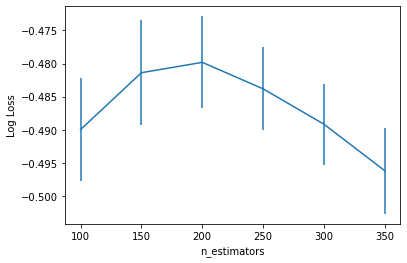

In [42]:
plt.errorbar(n_estimators, result.cv_results_['mean_test_score'], yerr = result.cv_results_['std_test_score'])
plt.xlabel("n_estimators")
plt.ylabel("Log Loss")
plt.show()

Now we will use Grid Search for tuning the size of the decision trees.

In [43]:
# Grid Search for size of trees
model = xg.XGBClassifier()
max_depth = range(1, 11, 2)
param_grid = dict(max_depth = max_depth)
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 7)
grid_search = GridSearchCV(model, param_grid, scoring = "neg_log_loss", n_jobs = -1, cv = kfold, verbose = 1)
result = grid_search.fit(X, label_encoder_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 26.1min finished


In [44]:
print("Best paramter is %s " % result.best_params_)
print("Best score is %f" % result.best_score_)

Best paramter is {'max_depth': 7} 
Best score is -0.482728


In [45]:
# Mean score for all the paramters tested
pd.DataFrame({"params": result.cv_results_['params'], "mean_score": result.cv_results_['mean_test_score'],
             "std_score": result.cv_results_['std_test_score']})

params  mean_score  std_score
0  {'max_depth': 1}   -0.729788   0.004931
1  {'max_depth': 3}   -0.557305   0.005455
2  {'max_depth': 5}   -0.502435   0.004596
3  {'max_depth': 7}   -0.482728   0.005454
4  {'max_depth': 9}   -0.482775   0.005348

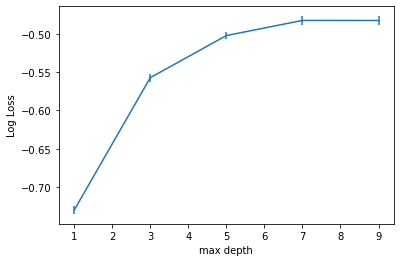

In [48]:
plt.errorbar(max_depth, result.cv_results_['mean_test_score'], yerr = result.cv_results_['std_test_score'])
plt.xlabel("max depth")
plt.ylabel("Log Loss")
plt.show()

There is a relationship between the number of trees in the model and the depth of each tree. We would expect that deeper trees would result in fewer trees being required in the model, and the inverse where simpler trees (such as decision stumps) require many more trees to achieve similar results.

In [49]:
# Grid Search for number and size of trees
model = xg.XGBClassifier()
max_depth = [2,4,6,8]
n_estimators = [50,100,150,200]
param_grid = dict(max_depth = max_depth, n_estimators = n_estimators)
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 7)
grid_search = GridSearchCV(model, param_grid, scoring = "neg_log_loss", n_jobs = -1, cv = kfold, verbose = 1)
result = grid_search.fit(X, label_encoder_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 97.0min finished


In [50]:
print("Best paramter is %s " % result.best_params_)
print("Best score is %f" % result.best_score_)

Best paramter is {'max_depth': 6, 'n_estimators': 200} 
Best score is -0.479826


In [51]:
# Mean score for all the paramters tested
pd.DataFrame({"params": result.cv_results_['params'], "mean_score": result.cv_results_['mean_test_score'],
             "std_score": result.cv_results_['std_test_score']})

params  mean_score  std_score
0    {'max_depth': 2, 'n_estimators': 50}   -0.678978   0.004768
1   {'max_depth': 2, 'n_estimators': 100}   -0.611325   0.004445
2   {'max_depth': 2, 'n_estimators': 150}   -0.582165   0.004838
3   {'max_depth': 2, 'n_estimators': 200}   -0.565219   0.005191
4    {'max_depth': 4, 'n_estimators': 50}   -0.565961   0.005360
5   {'max_depth': 4, 'n_estimators': 100}   -0.523906   0.005676
6   {'max_depth': 4, 'n_estimators': 150}   -0.506738   0.005507
7   {'max_depth': 4, 'n_estimators': 200}   -0.496759   0.004843
8    {'max_depth': 6, 'n_estimators': 50}   -0.518625   0.007267
9   {'max_depth': 6, 'n_estimators': 100}   -0.489946   0.007807
10  {'max_depth': 6, 'n_estimators': 150}   -0.481382   0.007898
11  {'max_depth': 6, 'n_estimators': 200}   -0.479826   0.006927
12   {'max_depth': 8, 'n_estimators': 50}   -0.496124   0.006681
13  {'max_depth': 8, 'n_estimators': 100}   -0.481470   0.006299
14  {'max_depth': 8, 'n_estimators': 150}   -0.486352   0.004689
15  {'max_depth': 8, 'n_estimators': 200}   -0.496454   0.004215

In [60]:
scores = result.cv_results_['mean_test_score'].reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label = 'depth' + str(value))
plt.legend()
plt.xlabel("n_estimators")
plt.ylabel("Log Loss")
plt.show()

### Learning Rate and Number of trees
A technique to slow down the learning in the gradient boosting model is to apply a weighting factor for the corrections by new trees when added to the model. This weighting is called the shrinkage factor or the learning rate

In [61]:
# Grid Search for learning rate
model = xg.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate = learning_rate)
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 7)
grid_search = GridSearchCV(model, param_grid, scoring = "neg_log_loss", n_jobs = -1, cv = kfold, verbose = 1)
result = grid_search.fit(X, label_encoder_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 33.1min finished


In [62]:
print("Best paramter is %s " % result.best_params_)
print("Best score is %f" % result.best_score_)

Best paramter is {'learning_rate': 0.3} 
Best score is -0.489946


In [63]:
# Mean score for all the paramters tested
pd.DataFrame({"params": result.cv_results_['params'], "mean_score": result.cv_results_['mean_test_score'],
             "std_score": result.cv_results_['std_test_score']})

params  mean_score  std_score
0  {'learning_rate': 0.0001}   -2.173576   0.000090
1   {'learning_rate': 0.001}   -1.991050   0.000672
2    {'learning_rate': 0.01}   -1.187270   0.002557
3     {'learning_rate': 0.1}   -0.543532   0.004986
4     {'learning_rate': 0.2}   -0.502286   0.005163
5     {'learning_rate': 0.3}   -0.489946   0.007807

In [65]:
plt.errorbar(learning_rate, result.cv_results_['mean_test_score'], yerr = result.cv_results_['std_test_score'])
plt.xlabel("Learning Rate")
plt.ylabel("Log Loss")
plt.show()

In [67]:
# Grid Search for learning rate and number of trees
model = xg.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1]
n_estimators = [100, 200, 300, 400, 500]
param_grid = dict(learning_rate = learning_rate, n_estimators = n_estimators)
kfold = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 7)
grid_search = GridSearchCV(model, param_grid, scoring = "neg_log_loss", n_jobs = 4, cv = kfold, verbose = 1)
result = grid_search.fit(X, label_encoder_y)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 148.0min
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed: 268.2min finished


In [68]:
print("Best paramter is %s " % result.best_params_)
print("Best score is %f" % result.best_score_)

Best paramter is {'learning_rate': 0.1, 'n_estimators': 500} 
Best score is -0.476740


In [69]:
# Mean score for all the paramters tested
pd.DataFrame({"params": result.cv_results_['params'], "mean_score": result.cv_results_['mean_test_score'],
             "std_score": result.cv_results_['std_test_score']})

params  mean_score  std_score
0   {'learning_rate': 0.0001, 'n_estimators': 100}   -2.173575   0.000059
1   {'learning_rate': 0.0001, 'n_estimators': 200}   -2.150737   0.000137
2   {'learning_rate': 0.0001, 'n_estimators': 300}   -2.128642   0.000219
3   {'learning_rate': 0.0001, 'n_estimators': 400}   -2.107256   0.000294
4   {'learning_rate': 0.0001, 'n_estimators': 500}   -2.086503   0.000376
5    {'learning_rate': 0.001, 'n_estimators': 100}   -1.991017   0.000626
6    {'learning_rate': 0.001, 'n_estimators': 200}   -1.833702   0.000872
7    {'learning_rate': 0.001, 'n_estimators': 300}   -1.705948   0.001123
8    {'learning_rate': 0.001, 'n_estimators': 400}   -1.598430   0.001171
9    {'learning_rate': 0.001, 'n_estimators': 500}   -1.506584   0.001338
10    {'learning_rate': 0.01, 'n_estimators': 100}   -1.188215   0.001317
11    {'learning_rate': 0.01, 'n_estimators': 200}   -0.882664   0.001996
12    {'learning_rate': 0.01, 'n_estimators': 300}   -0.743423   0.001757
13    {'learning_rate': 0.01, 'n_estimators': 400}   -0.670932   0.001983
14    {'learning_rate': 0.01, 'n_estimators': 500}   -0.627510   0.002161
15     {'learning_rate': 0.1, 'n_estimators': 100}   -0.544647   0.003019
16     {'learning_rate': 0.1, 'n_estimators': 200}   -0.502218   0.003743
17     {'learning_rate': 0.1, 'n_estimators': 300}   -0.486990   0.003767
18     {'learning_rate': 0.1, 'n_estimators': 400}   -0.479582   0.003343
19     {'learning_rate': 0.1, 'n_estimators': 500}   -0.476740   0.002665

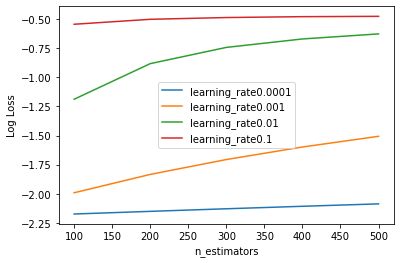

In [70]:
scores = result.cv_results_['mean_test_score'].reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label = 'learning_rate' + str(value))
plt.legend()
plt.xlabel("n_estimators")
plt.ylabel("Log Loss")
plt.show()

### Tuning Row Subsample and Column Subsample


In [71]:
# Grid Search for Row Subsample
model = xg.XGBClassifier()
subsample = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
param_grid = dict(subsample = subsample)
kfold = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 7)
grid_search = GridSearchCV(model, param_grid, scoring = "neg_log_loss", n_jobs = -1, cv = kfold, verbose = 1)
result = grid_search.fit(X, label_encoder_y)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed: 28.6min finished


In [72]:
print("Best paramter is %s " % result.best_params_)
print("Best score is %f" % result.best_score_)

Best paramter is {'subsample': 0.8} 
Best score is -0.486725


In [73]:
# Mean score for all the paramters tested
pd.DataFrame({"params": result.cv_results_['params'], "mean_score": result.cv_results_['mean_test_score'],
             "std_score": result.cv_results_['std_test_score']})

params  mean_score  std_score
0  {'subsample': 0.2}   -0.525227   0.003406
1  {'subsample': 0.3}   -0.511439   0.001703
2  {'subsample': 0.4}   -0.497868   0.004318
3  {'subsample': 0.5}   -0.493268   0.003440
4  {'subsample': 0.6}   -0.488883   0.003247
5  {'subsample': 0.7}   -0.488163   0.001617
6  {'subsample': 0.8}   -0.486725   0.002786
7  {'subsample': 1.0}   -0.491016   0.003719

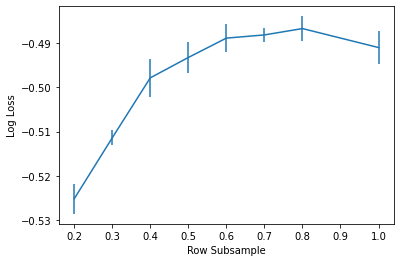

In [74]:
plt.errorbar(subsample, result.cv_results_['mean_test_score'], yerr = result.cv_results_['std_test_score'])
plt.xlabel("Row Subsample")
plt.ylabel("Log Loss")
plt.show()

In [75]:
# Grid Search for Column Subsample
model = xg.XGBClassifier()
colsample_bytree = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
param_grid = dict(colsample_bytree = colsample_bytree)
kfold = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 7)
grid_search = GridSearchCV(model, param_grid, scoring = "neg_log_loss", n_jobs = -1, cv = kfold, verbose = 1)
result = grid_search.fit(X, label_encoder_y)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed: 20.3min finished


In [76]:
print("Best paramter is %s " % result.best_params_)
print("Best score is %f" % result.best_score_)

Best paramter is {'colsample_bytree': 0.8} 
Best score is -0.490274


In [77]:
# Mean score for all the paramters tested
pd.DataFrame({"params": result.cv_results_['params'], "mean_score": result.cv_results_['mean_test_score'],
             "std_score": result.cv_results_['std_test_score']})

params  mean_score  std_score
0  {'colsample_bytree': 0.2}   -0.507673   0.003572
1  {'colsample_bytree': 0.3}   -0.499703   0.005067
2  {'colsample_bytree': 0.4}   -0.495703   0.003724
3  {'colsample_bytree': 0.5}   -0.494027   0.004867
4  {'colsample_bytree': 0.6}   -0.491562   0.002760
5  {'colsample_bytree': 0.7}   -0.491005   0.002704
6  {'colsample_bytree': 0.8}   -0.490274   0.002970
7  {'colsample_bytree': 1.0}   -0.491016   0.003719

In [78]:
plt.errorbar(colsample_bytree, result.cv_results_['mean_test_score'], yerr = result.cv_results_['std_test_score'])
plt.xlabel("Column Subsample")
plt.ylabel("Log Loss")
plt.show()